In [23]:
import tensorflow as tf
from tensorflow.python.client import device_lib 
from tensorflow.python.client import device_lib

In [24]:
AUTOTUNE = tf.data.experimental.AUTOTUNE

In [25]:
import IPython.display as display

from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import os
import pathlib
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Activation

np.set_printoptions(suppress=True)

In [26]:
# import the needed packages
import matplotlib.image as img
from tensorflow import keras
# shortcut to the ImageDataGenerator class
ImageDataGenerator = keras.preprocessing.image.ImageDataGenerator

In [27]:
path='./dataset'
data_dir=pathlib.Path(path)

In [28]:
tf.test.is_gpu_available(
    cuda_only=False, min_cuda_compute_capability=None
)

True

In [29]:
path="D:\CODE\CNN\\final_project\\finalCNN\dataset"
data_dir=pathlib.Path(path)
image_count = len(list(data_dir.glob('*/*.jpg')))
image_count

47127

In [30]:
CLASS_NAMES = np.array([item.name for item in data_dir.glob('*')])
CLASS_NAMES

array(['cars', 'cats', 'dogs', 'flowers', 'human', 'motobikes'],
      dtype='<U9')

In [31]:
image_generator=ImageDataGenerator(rescale=1./255)

In [32]:
BATCH_SIZE = 60
IMG_HEIGHT = 256
IMG_WIDTH = 256
STEPS_PER_EPOCH = np.ceil(image_count/BATCH_SIZE)
input_shape = (IMG_WIDTH, IMG_HEIGHT, 3)

In [33]:
train_data_gen = image_generator.flow_from_directory(directory=str(data_dir),
                                                     batch_size=BATCH_SIZE,
                                                     shuffle=True,
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                     classes = list(CLASS_NAMES))

Found 47127 images belonging to 6 classes.


In [34]:
def show_batch(image_batch, label_batch):
  plt.figure(figsize=(10,10))
  for n in range(25):
      ax = plt.subplot(5,5,n+1)
      plt.imshow(image_batch[n])
      plt.title(CLASS_NAMES[label_batch[n]==1][0].title())
      plt.axis('off')

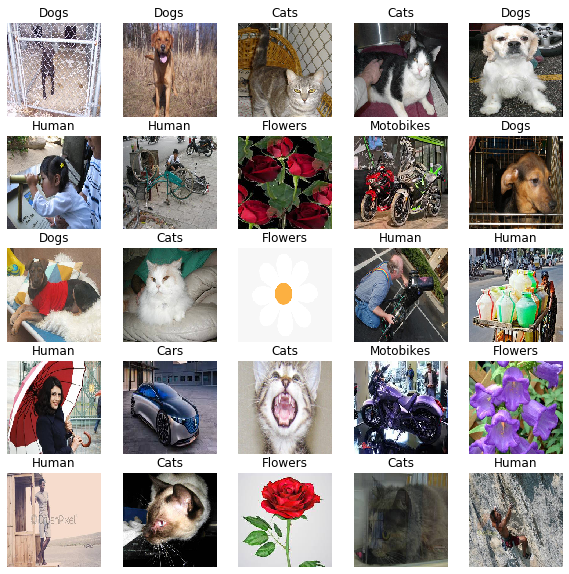

In [35]:
image_batch, label_batch = next(train_data_gen)
show_batch(image_batch, label_batch)

In [36]:
imgDataGen=ImageDataGenerator(
    validation_split=0.2,
    rescale=1./255,
    horizontal_flip=True,
    zoom_range=0.3,
    rotation_range=15.,
    width_shift_range=0.1,
    height_shift_range=0.1,
)

In [37]:
train_dataset = imgDataGen.flow_from_directory(
    directory=str(data_dir),
    target_size = (IMG_HEIGHT, IMG_WIDTH), 
    classes = list(CLASS_NAMES),
    batch_size = BATCH_SIZE,
    subset = 'training'
)

val_dataset = imgDataGen.flow_from_directory(
    directory=str(data_dir),
    target_size = (IMG_HEIGHT, IMG_WIDTH), 
    classes = list(CLASS_NAMES),
    batch_size =BATCH_SIZE,
    subset = 'validation'
)

Found 37703 images belonging to 6 classes.
Found 9424 images belonging to 6 classes.


In [38]:

model.add(Conv2D(32, (3,3), input_shape=(ROWS, COLS, CHANNELS), activation='relu'))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(128, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(256, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(512, (1,1), activation='relu'))
#model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Flatten())
model.add(Dropout(0.4))

model.add(Dense(units=120, activation='relu'))
model.add(Dense(units=6, activation='sigmoid'))

model.summary()

In [39]:
model.compile(loss='binary_crossentropy',
              optimizer=keras.optimizers.Adamax(lr=0.001),
              metrics=['acc'])

In [18]:
history = model.fit_generator(
    train_dataset, 
    steps_per_epoch=STEPS_PER_EPOCH,
    validation_data = val_dataset,
    workers=10,
    epochs=20,
)

Epoch 1/20


ResourceExhaustedError:  OOM when allocating tensor with shape[128,64,128,128] and type float on /job:localhost/replica:0/task:0/device:GPU:0 by allocator GPU_0_bfc
	 [[node conv2d_3/convolution (defined at C:\ProgramData\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:3009) ]]
Hint: If you want to see a list of allocated tensors when OOM happens, add report_tensor_allocations_upon_oom to RunOptions for current allocation info.
 [Op:__inference_keras_scratch_graph_1432]

Function call stack:
keras_scratch_graph


In [19]:
def plot_history(history, yrange):
    '''Plot loss and accuracy as a function of the epoch,
    for the training and validation datasets.
    '''
    acc = history.history['acc']
    val_acc = history.history['val_acc']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    # Get number of epochs
    epochs = range(len(acc))

    # Plot training and validation accuracy per epoch
    plt.plot(epochs, acc)
    plt.plot(epochs, val_acc)
    plt.title('Training and validation accuracy')
    plt.ylim(yrange)
    
    # Plot training and validation loss per epoch
    plt.figure()

    plt.plot(epochs, loss)
    plt.plot(epochs, val_loss)
    plt.title('Training and validation loss')
    
    plt.show()

In [20]:
plot_history(history, (0.65, 1.))

NameError: name 'history' is not defined

In [21]:
import h5py
from keras.models import load_model
model.save('trained-model_new.h5')

In [22]:
model_new=tf.keras.models.load_model('trained-model.h5')
model_new.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 254, 254, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 127, 127, 32)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 125, 125, 64)      18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 62, 62, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 62, 62, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 60, 60, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 30, 30, 128)      